# Autocorrelation

measures the relationship between a variiables current value and past value

Lagged over one or more time periods

t vs t - k



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bikesharing_data = pd.read_csv('bike_sharing_hourly.csv',index_col=0)
bikesharing_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# does a statistical relationship exist between temp and humidity
bikesharing_data[['temp','hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [7]:
# Correlation with itself from a lag in time
bikesharing_data['temp'].autocorr(lag=2)

0.9806849149013231

In [8]:
bikesharing_data['temp'].autocorr(lag=12)

0.8250709628213124

In [9]:
bikesharing_data['temp'].autocorr(lag=102)

0.765826902229808

In [10]:
bikesharing_data['temp'].autocorr(lag=255)

0.7084892473863931

In [11]:
bikesharing_data['temp'].autocorr(lag=1002)

0.5654240428575

In [12]:
bikesharing_data['hum'].autocorr(lag=2)

0.8883072701671811

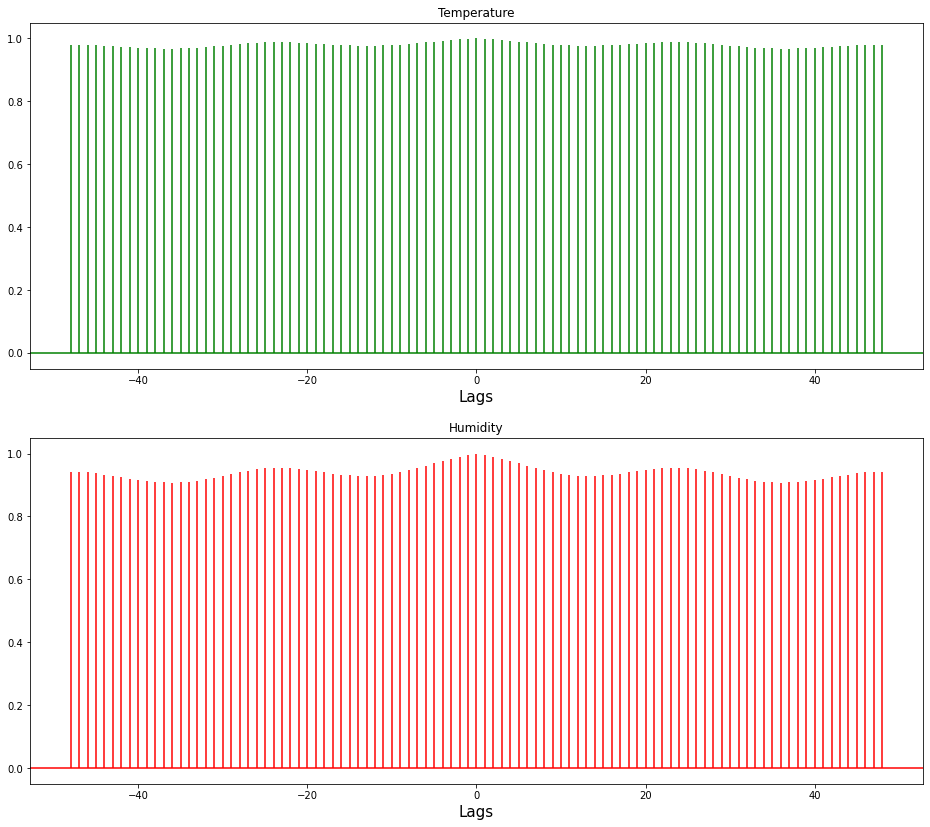

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,14))

ax1.acorr(bikesharing_data['temp'],maxlags=48,color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags',fontsize=15)

ax2.acorr(bikesharing_data['hum'],maxlags=48,color='red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags',fontsize=15)
plt.show();

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

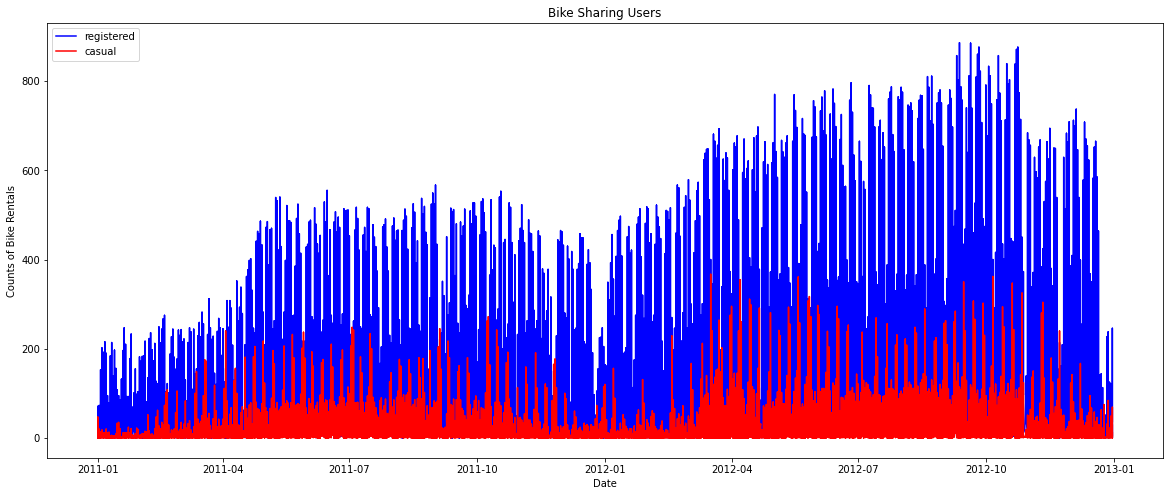

In [18]:
plt.figure(figsize=(20,8))
plt.plot(bikesharing_data['dteday'],
        bikesharing_data['registered'],
        color='b',
        label='registered')
plt.plot(bikesharing_data['dteday'],
        bikesharing_data['casual'],
        color='r',
        label='casual')
plt.legend(loc='upper left')
plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show();

In [19]:
year_df = bikesharing_data.groupby('yr',as_index=False).mean()
year_df[['yr','cnt']]

,yr,cnt
0,0,143.794448
1,1,234.666361


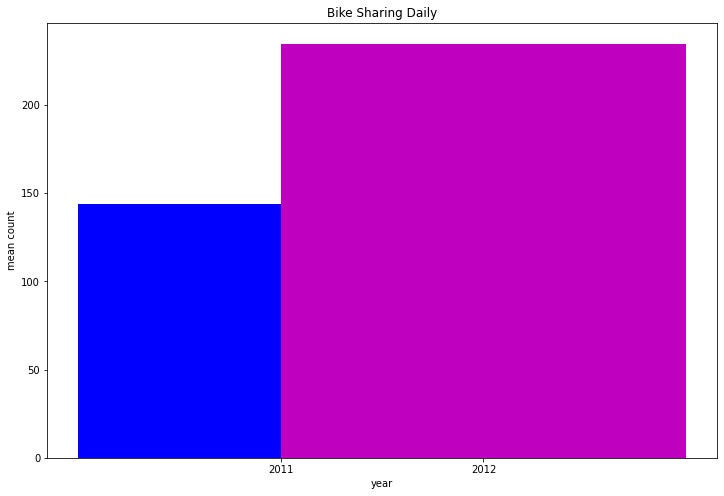

In [20]:
plt.figure(figsize=(12,8))
colors = ['b','m']
plt.bar(year_df['yr'],year_df['cnt'],width=2.0,color=colors)
plt.xticks([0,1],['2011','2012'])
plt.title('Bike Sharing Daily')
plt.xlabel('year')
plt.ylabel('mean count')

plt.show();